In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../') 

from scipy.sparse import coo_matrix
import numpy as np

from dataset import QM9

from torch_geometric.datasets import QM9 as TQM9
from torch_geometric.data import Data



RDKit WARNING: [08:06:45] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
ds_params = {'train_params': {'n': 1000,
                              'db': 'rdkit',
                              'n_conformers': 1,
                              'features': ['n_atoms','A','B','C','mu',
                                           'alpha','homo','lumo','gap','r2','zpve','Cv',
                                           'mulliken','distance','coulomb','aromatic',
                                           'degree'],
                              'embeds': ['atom_types','chirality','hybridization'],
                              'targets': ['U0'],
                              'pad': None,
                              'do_not_pad': ['U0','n_atoms','A','B','C','mu',
                                             'alpha','homo','lumo','gap','r2','zpve','Cv'],
                              #'filter_on': ('n_atoms','>','18'),
                              'use_pickle': False,
                              'flatten': True,
                              'embed_lookup': {'0': 0, 'H': 1, 'C': 2, 'N': 3, 'O': 4, 'F': 5,
                                               'CHI_UNSPECIFIED': 6, 'CHI_TETRAHEDRAL_CW': 7,
                                               'CHI_TETRAHEDRAL_CCW':8, 'CHI_OTHER': 9, 
                                               'UNSPECIFIED': 10, 'S': 11, 'SP': 12, 
                                               'SP2': 13, 'SP3': 14, 'SP3D': 15, 'SP3D2': 16,
                                               'OTHER': 17, 'misc': 18,}}}

qm9 = QM9(**ds_params['train_params'])

creating QM9 dataset...
molecules scanned:  1
molecules removed for no rdkit conformer:  0
molecules created:  1
molecules scanned:  1001
molecules removed for no rdkit conformer:  15
molecules created:  986
total molecules scanned:  1015
total molecules removed for no rdkit conformer:  15
total uncharacterized molecules removed:  26
total molecules created:  974
CDataset created...


In [3]:
mol = qm9.ds[5]
mol

dsgdb9nsd_000005

In [8]:
qm9[5]

(array([ 3.00000000e+00,  0.00000000e+00,  4.45938835e+01,  4.45938835e+01,
         2.89369988e+00,  1.29899998e+01, -3.60399991e-01,  1.90999992e-02,
         3.79599988e-01,  4.87476006e+01,  1.66010000e-02,  6.27799988e+00,
        -4.96560000e-02, -1.88473001e-01,  2.38128006e-01,  0.00000000e+00,
         1.16098726e+00,  1.06317782e+00,  1.16098726e+00,  0.00000000e+00,
         2.22408032e+00,  1.06317782e+00,  2.22408032e+00,  0.00000000e+00,
         5.33587189e+01,  2.43947468e+01,  3.07678947e+01,  1.68529167e+01,
         3.68581123e+01,  2.63724823e+01,  2.80881977e+00,  3.48496389e+00,
         5.00000000e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00]),
 [array([2, 3, 1]), array([6, 6, 6]), array([12, 12, 10])],
 array([-93.41189], dtype=float32))

In [9]:
mol.edge_indices

array([[0, 1],
       [1, 0],
       [0, 2],
       [2, 0]])

In [10]:
mol.edge_attr

array([[4, 6, 0, 0],
       [4, 6, 0, 0],
       [2, 6, 0, 0],
       [2, 6, 0, 0]])

In [5]:
mol.rdmol.GetNumConformers()

1

In [6]:
for f in dir(mol):
    print(f)
    print(getattr(mol, f))

A
[0.]
B
[44.593884]
C
[44.593884]
Cv
[6.278]
G
[-93.431244]
H
[-93.408424]
U
[-93.40937]
U0
[-93.41189]
__abstractmethods__
frozenset()
__class__
<class 'dataset.QM9Mol'>
__delattr__
<method-wrapper '__delattr__' of QM9Mol object at 0x7fdd69270fd0>
__dict__
{'in_file': './data/qm9/qm9.xyz/dsgdb9nsd_000005.xyz', 'qm9_block': ['3\n', 'gdb 5\t0.\t44.593883\t44.593883\t2.8937\t12.99\t-0.3604\t0.0191\t0.3796\t48.7476\t0.016601\t-93.411888\t-93.40937\t-93.408425\t-93.431246\t6.278\t\n', 'C\t-0.0133239314\t 1.1324657151\t 0.0082758861\t-0.049656\n', 'N\t 0.0023107217\t-0.0191585871\t 0.0019287305\t-0.188473\n', 'H\t-0.0278026991\t 2.1989492963\t 0.0141537903\t 0.238128\n', '799.0101\t799.0101\t2198.4393\t3490.3686\n', 'C#N\tC#N\t\n', 'InChI=1S/CHN/c1-2/h1H\tInChI=1S/CHN/c1-2/h1H\n'], 'smile': 'C#N\tC#N\t\n', 'qm9_n_atoms': 3, 'A': array([0.], dtype=float32), 'B': array([44.593884], dtype=float32), 'C': array([44.593884], dtype=float32), 'mu': array([2.8937], dtype=float32), 'alpha': array([1

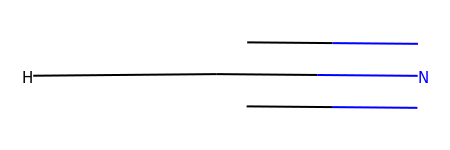

In [7]:
mol.rdmol